In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
condition = "day6_22C"
all_gwas_path =  "/cluster/scratch/afeurtey/Kmer_GWAS/5_GWAS_results/"
dir_path = all_gwas_path + "GWAS_output_dir_" + condition + "/kmers/"

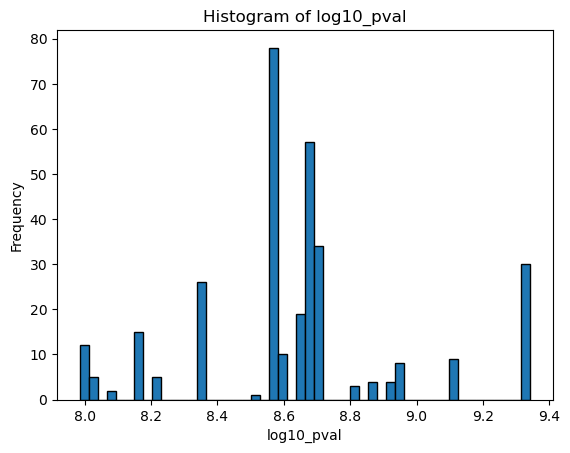

In [219]:


df = pd.read_csv(dir_path + 'pass_threshold_10per', sep='\t')

# Add a new column with -log10 of values from column 'p_lrt'
df['log10_pval'] = -np.log10(df['p_lrt'])

df
# Save the updated dataframe to a new CSV file
#df.to_csv('updated_pass_threshold_10per.csv', index=False)

# Plot histogram from the new column
plt.hist(df['log10_pval'], bins=50, edgecolor='black')
plt.title('Histogram of log10_pval')
plt.xlabel('log10_pval')
plt.ylabel('Frequency')
plt.show()

In [220]:

#Read only 10000 first lines of tsv file
df = pd.read_csv(dir_path + 'output/phenotype_value.assoc.txt.gz', sep='\t')

# Add a new column with -log10 of values from column 'p_lrt'
df['log10_pval'] = -np.log10(df['p_lrt'])

df



,chr,rs,ps,n_miss,allele1,allele0,af,l_mle,p_lrt,log10_pval
0,0,AAAAAAGGGCGGTAAACTGCACAATTAGAGT_1976,0,0,0,1,0.942,0.024966,1.644397e-07,6.783993
1,0,AAAAAAGGTCGGCGTTTTAGATATTTAAGAC_3599,0,0,0,1,0.908,1.104411,3.046289e-05,4.516229
2,0,AAAAAATAATTCCTGAGCGGCACGATGCTCT_5728,0,0,0,1,0.862,0.806230,6.122022e-05,4.213105
3,0,AAAAAGAAACTTTCTCCAATTAGTGTATAAG_7301,0,0,0,1,0.080,0.400846,1.400291e-04,3.853782
4,0,AAAAAGAGGGAGAGCAGGAAGACGAGGACGG_5402,0,0,0,1,0.809,0.345965,6.564985e-05,4.182766
...,...,...,...,...,...,...,...,...,...,...
9996,0,TTGAACCCGCGACATTTAAAGCTAGATTCAA_427,0,0,0,1,0.871,0.062700,1.410828e-06,5.850526
9997,0,TTGAGGCCTCCTTAAGAGGTGGCTGCCGAAA_8341,0,0,0,1,0.797,0.000010,1.487273e-05,4.827609
9998,0,TTGAGTGATGAGTTCCAGTCTCAATGTGAAA_6300,0,0,0,1,0.723,0.136423,5.299995e-05,4.275725
9999,0,TTGCGATTCGAATAGCGTATCGCATAGAAAA_916,0,0,0,1,0.908,0.627000,7.055962e-06,5.151444


In [221]:
single_value_df = pd.read_csv(dir_path + 'threshold_10per', nrows=1, header=None, sep='\t')
single_value = single_value_df.iloc[0, 0]
print(single_value)

7.94526


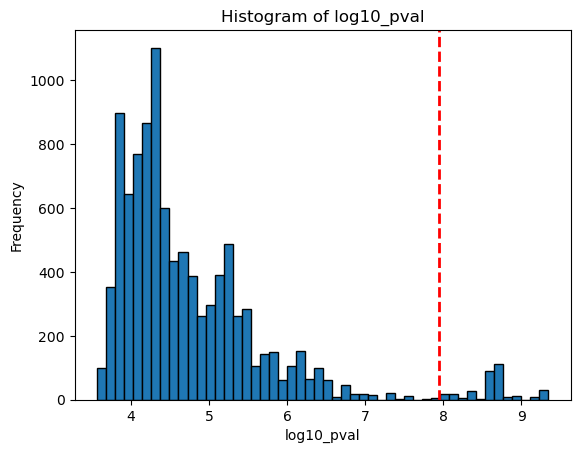

In [222]:


# Plot histogram
plt.hist(df['log10_pval'], bins=50, edgecolor='black')

# Add vertical line
plt.axvline(single_value, color='r', linestyle='dashed', linewidth=2)
plt.title('Histogram of log10_pval')
plt.xlabel('log10_pval')
plt.ylabel('Frequency')
plt.show()

In [223]:
columns_names = ["rs", "sseqid", "pident", "length", "mismatch", "gapopen", "qstart", "qend", "sstart", "send", "evalue bitscore", "lala"]
pos_df = pd.read_csv(dir_path + 'output/phenotype_value.assoc_for_fetch.blast.tsv', sep='\t', 
                     header=None,  index_col = None, names = columns_names)

pos_df = pos_df[["rs", "sseqid", "sstart", "send"]]
pos_df["position"] = (pos_df["sstart"] + pos_df["send"]) / 2
pos_df["position"] = pos_df["position"].astype(int)
pos_df  = pos_df[["rs", "sseqid", "position"]]
pos_df


FileNotFoundError: [Errno 2] No such file or directory: '/cluster/scratch/afeurtey/Kmer_GWAS/5_GWAS_results/GWAS_output_dir_day6_22C/kmers/output/phenotype_value.assoc_for_fetch.blast.tsv'

In [ ]:
df2 = pd.merge(pos_df, df, on='rs', how='inner')
df2

df2 = df2[df2['sseqid'] != 'mt']
print(df2.shape)
# Create a new column that is the rank of the order of the chromosomes
df2['chromosome'] = df2['sseqid'].astype('category')
df2['chromosome'] = df2['chromosome'].astype(int).astype('category')

df2['chr_index'] = df2['chromosome'].cat.codes

# Calculate cumulative position along the genome
# Sort the DataFrame by chromosome and position
df2 = df2.sort_values(['chromosome', 'position'])

# Calculate the difference between the current and previous position
df2['position_diff'] = df2.groupby('chromosome')['position'].diff()

# Replace NaN values with the original position
df2['position_diff'] = df2['position_diff'].fillna(df2['position'])

df2['cumulative_position'] = df2['position_diff'].transform(lambda x: x.cumsum())
df2['global_position'] = df2['cumulative_position'] + df2['chr_index'] * 1e7  # add gaps between chromosomes


df2


(4980, 12)


/tmp/ipykernel_12900/1041159725.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2['position_diff'] = df2.groupby('chromosome')['position'].diff()


,rs,sseqid,position,chr,ps,n_miss,allele1,allele0,af,l_mle,p_lrt,log10_pval,chromosome,chr_index,position_diff,cumulative_position,global_position
4050,GATGCGACTGCGCTACGATTACGACAGATAC_9187,1,4404,0,0,0,0,1,0.932,0.366465,0.000079,4.104189,1,0,4404.0,4404.0,4404.0
4872,TCGTCGCCGTTAGTAGCTATGCCTCTTATAA_3988,1,8794,0,0,0,0,1,0.935,0.000010,0.000013,4.890467,1,0,4390.0,8794.0,8794.0
3589,CTCGTCGCCGTTAGTAGCTATGCCTCTTATA_3987,1,8795,0,0,0,0,1,0.935,0.000010,0.000013,4.890467,1,0,1.0,8795.0,8795.0
3060,CGAAGGAGACGAGGTCTAGCGAGTTGTCGAC_1121,1,10058,0,0,0,0,1,0.929,0.737848,0.000003,5.587570,1,0,1263.0,10058.0,10058.0
407,AAGGAGACGAGGTCTAGCGAGTTGTCGACAG_1746,1,10059,0,0,0,0,1,0.926,0.727867,0.000005,5.263977,1,0,1.0,10059.0,10059.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,GCCGAGTCATCCAATCGGCTTCATCTCATCC_5261,21,271444,0,0,0,0,1,0.799,0.000010,0.000006,5.222685,21,20,0.0,39000163.0,239000163.0
3139,CGAGTCATCCAATCGGCTTCATCTCATCCCA_4222,21,271445,0,0,0,0,1,0.808,0.000010,0.000004,5.359345,21,20,1.0,39000164.0,239000164.0
4007,GAGTCATCCAATCGGCTTCATCTCATCCCAC_4221,21,271445,0,0,0,0,1,0.808,0.000010,0.000004,5.359345,21,20,0.0,39000164.0,239000164.0
154,AACACGCACACGAGGCCTAATAGTACAGAGC_3336,21,400522,0,0,0,0,1,0.920,0.610816,0.000017,4.780668,21,20,129077.0,39129241.0,239129241.0


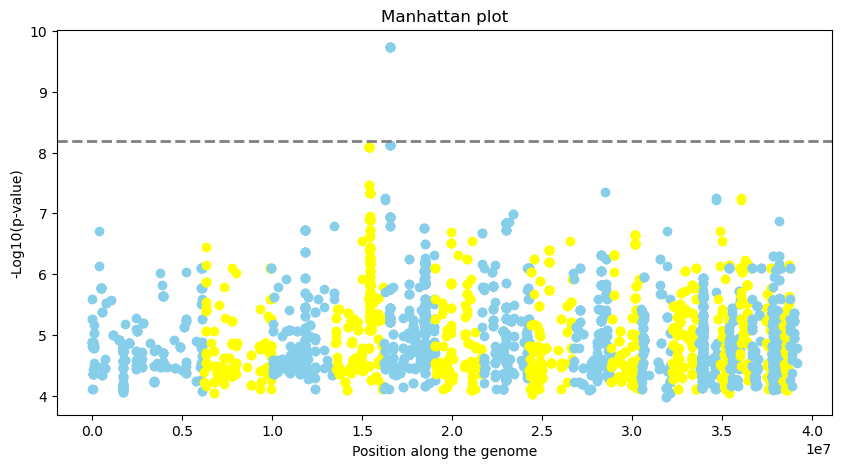

<Figure size 640x480 with 0 Axes>

In [ ]:


# Create the Manhattan plot
plt.figure(figsize=(10, 5))
#plt.scatter(df2['cumulative_position'], df2['log10_pval'], color='skyblue')
# Define colors
colors = ['skyblue', 'yellow']
for chrom, data in df2.groupby('chr_index'):
    plt.scatter(data['cumulative_position'], data['log10_pval'], color=colors[chrom % len(colors)])
plt.axhline(single_value, color='grey', linestyle='dashed', linewidth=2)
plt.ylabel('-Log10(p-value)')
plt.xlabel('Position along the genome')
plt.title('Manhattan plot')
plt.show()

# Save plot to file
plt.savefig(all_gwas_path + 'manhattan_plot_' + condition + '.png')

In [ ]:
#Filter the dataframe to keep only the significant values
df2 = df2[df2['log10_pval'] > single_value]
df2

,rs,sseqid,position,chr,ps,n_miss,allele1,allele0,af,l_mle,p_lrt,log10_pval,chromosome,chr_index,position_diff,cumulative_position,global_position
4333,GGACCGTAGTATATCTGACGTTCGTGAGCAA_51,5,366371,0,0,0,0,1,0.941,0.00001,1.836642e-10,9.735975,5,4,3.0,16543877.0,56543877.0
830,ACCGTAGTATATCTGACGTTCGTGAGCAAGC_68,5,366372,0,0,0,0,1,0.941,0.00001,1.836642e-10,9.735975,5,4,1.0,16543878.0,56543878.0
3758,CTTGCTCACGAACGTCAGATATACTACGGTC_48,5,366372,0,0,0,0,1,0.941,0.00001,1.836642e-10,9.735975,5,4,0.0,16543878.0,56543878.0
679,ACAATTCCTCTCTTCCAAGGCACTTTCAGCC_55,5,366433,0,0,0,0,1,0.941,0.00001,1.836642e-10,9.735975,5,4,61.0,16543939.0,56543939.0
620,AATTCCTCTCTTCCAAGGCACTTTCAGCCGT_57,5,366435,0,0,0,0,1,0.941,0.00001,1.836642e-10,9.735975,5,4,2.0,16543941.0,56543941.0
2344,CAATTCCTCTCTTCCAAGGCACTTTCAGCCG_58,5,366435,0,0,0,0,1,0.941,0.00001,1.836642e-10,9.735975,5,4,0.0,16543941.0,56543941.0
